# Game Rating Predictor Model Building

## Exploratory Data Analysis

In [37]:
# Load modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os 
os.getcwd()

'/Users/aarontang/Desktop/Projects/Video Game Rating Forecast /backend'

In [105]:
# Load data
games_cleaned = pd.read_csv("/Users/aarontang/Desktop/Projects/Video Game Rating Forecast /csv/games_cleaned.csv")
games_cleaned.head()

,genres,name,themes,total_rating,company,updated_at,Adventure,Arcade,Card & Board Game,Fighting,...,Non-fiction,Open world,Party,Romance,Sandbox,Science fiction,Stealth,Survival,Thriller,Warfare
0,['Fighting'],Ultimate Mortal Kombat 3,"['Action', 'Fantasy', 'Horror']",69.931536,Electronic Arts,2025-08-26 19:20:58,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,['Simulator'],LHX: Attack Chopper,"['Action', 'Warfare']",76.526374,Electronic Arts,2025-08-26 19:20:58,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,['Adventure'],Harry Potter and the Order of the Phoenix,"['Action', 'Fantasy', 'Open world']",62.223741,Electronic Arts,2025-08-26 19:20:58,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"['Fighting', 'Racing']",Road Rash,['Action'],68.588361,Electronic Arts,2025-08-26 19:20:58,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"['Fighting', 'Sport']",WCW Backstage Assault,['Action'],47.100042,Electronic Arts,2025-08-26 19:20:58,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Explore data 
games_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 48 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   genres                                          309 non-null    object 
 1   name                                            316 non-null    object 
 2   themes                                          272 non-null    object 
 3   total_rating                                    316 non-null    float64
 4   company                                         316 non-null    object 
 5   updated_at                                      316 non-null    object 
 6   Adventure                                       316 non-null    int64  
 7   Arcade                                          316 non-null    int64  
 8   Card & Board Game                               316 non-null    int64  
 9   Fighting                                   

`total_rating` is the response variable.

In [107]:
games_cleaned.describe()

,total_rating,Adventure,Arcade,Card & Board Game,Fighting,Hack and slash/Beat 'em up,MOBA,Music,Pinball,Platform,...,Non-fiction,Open world,Party,Romance,Sandbox,Science fiction,Stealth,Survival,Thriller,Warfare
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,...,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,71.564061,0.250000,0.136076,0.031646,0.050633,0.018987,0.009494,0.009494,0.006329,0.193038,...,0.031646,0.041139,0.053797,0.009494,0.06962,0.180380,0.006329,0.047468,0.006329,0.041139
std,13.118782,0.433699,0.343413,0.175332,0.219595,0.136697,0.097126,0.097126,0.079429,0.395309,...,0.175332,0.198927,0.225975,0.097126,0.25491,0.385113,0.079429,0.212976,0.079429,0.198927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.295977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.564087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,96.113516,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='total_rating', ylabel='Count'>

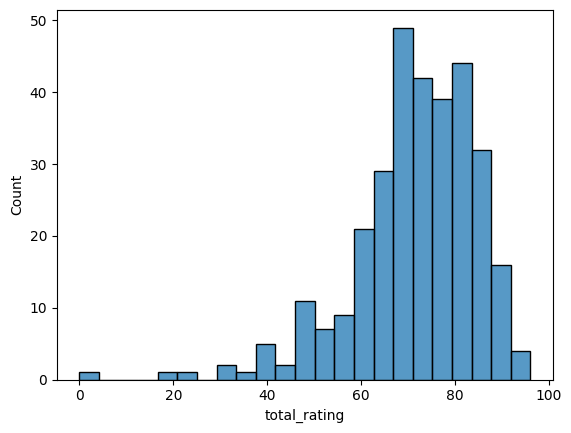

In [108]:
# Data Visualizations
sns.histplot(games_cleaned['total_rating'])

The distribution of `total_rating` appear to be skewed to the left.

<Axes: xlabel='company', ylabel='total_rating'>

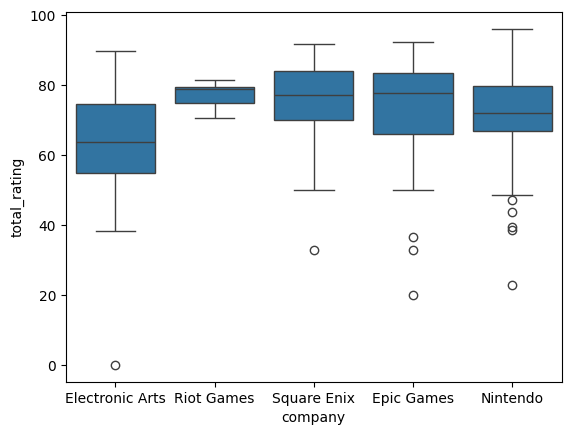

In [109]:
sns.boxplot(x = 'company', y = 'total_rating', data = games_cleaned)

Total ratings across the different gaming companies seem to be relatively similar.

Text(0, 0.5, 'Mean ratings')

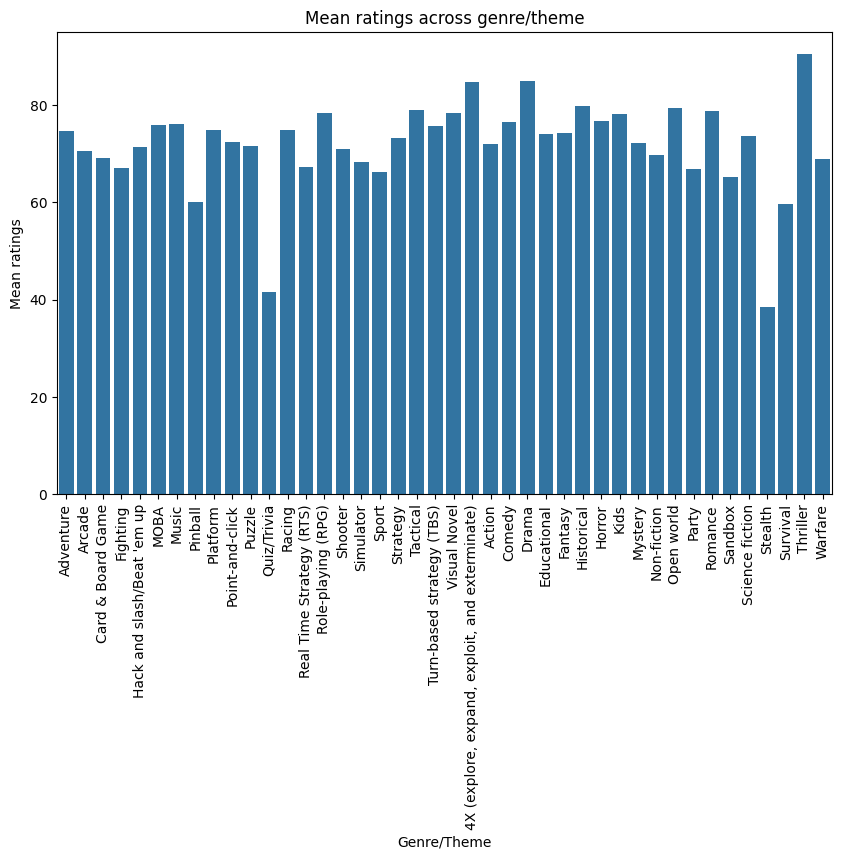

In [110]:
mean_rating_by_genre_theme = []
for item in list(games_cleaned.loc[:,'Adventure':].columns):
    mean_rating_by_genre_theme.append(games_cleaned.groupby(item)['total_rating'].mean()[1])

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = list(games_cleaned.loc[:,'Adventure':].columns), y = mean_rating_by_genre_theme, ax = ax)

ax.tick_params(axis = 'x', labelrotation = 90)
plt.title("Mean ratings across genre/theme")
plt.xlabel("Genre/Theme")
plt.ylabel("Mean ratings")

Mean ratings across the different genres/themes seem to be relatively the same throughout.

Text(0, 0.5, 'Frequency')

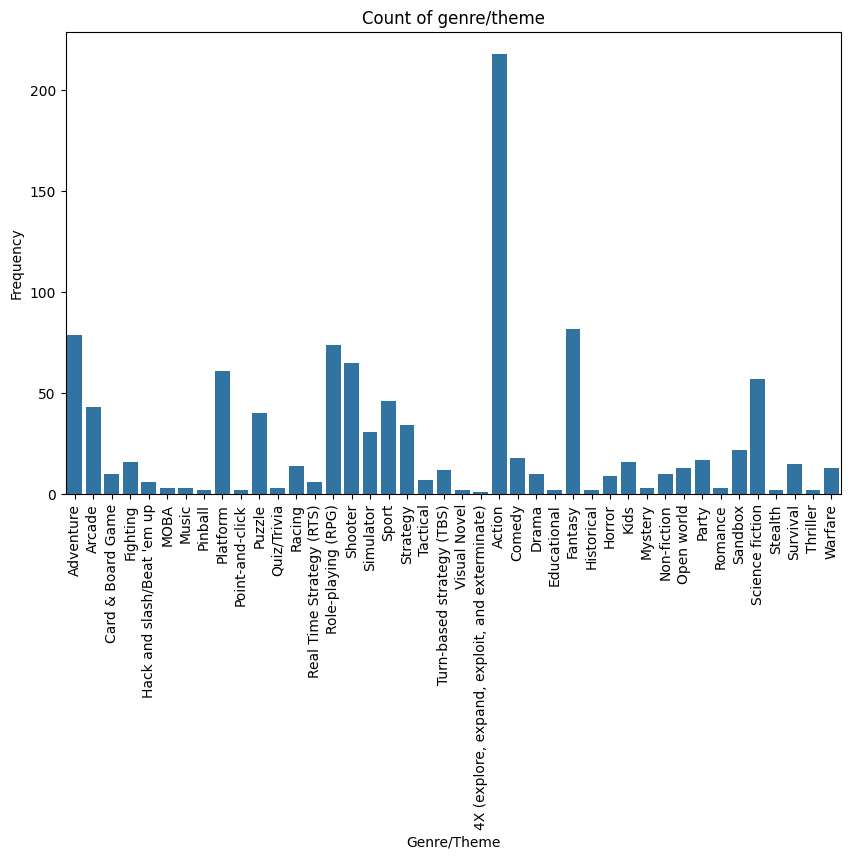

In [111]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x =list(games_cleaned.loc[:,'Adventure':].columns), y = games_cleaned.loc[:,'Adventure':].sum())

ax.tick_params(axis = 'x', labelrotation = 90)
plt.title("Count of genre/theme")
plt.xlabel("Genre/Theme")
plt.ylabel("Frequency")

Looking at this, the theme of action seems to be the most popular theme in gaming.

<Axes: >

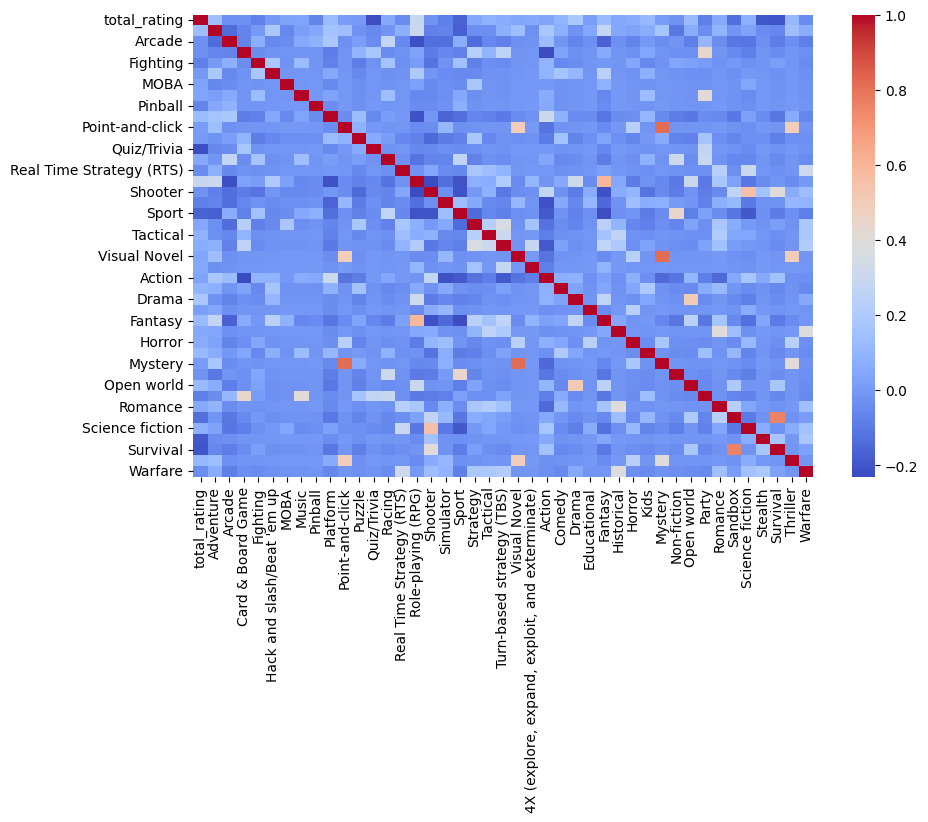

In [112]:
corr_matrix = games_cleaned.select_dtypes(exclude = 'object').corr()
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr_matrix, annot = False, ax = ax, cmap = 'coolwarm')

There does not appear to be any multicollinearity. In addition, there does not appear to be any correlation between `total_rating` and the other features.

## Initial Model Building

In [64]:
# Load modules 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [113]:
# Data splits
X = games_cleaned.drop(['genres','name','total_rating','themes','company','updated_at'], axis = 1)
y = games_cleaned['total_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [114]:
# Random Forest Model
model = RandomForestRegressor(random_state = 123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.001125106786128
0.09674911696150801


Text(0, 0.5, 'R^2 score')

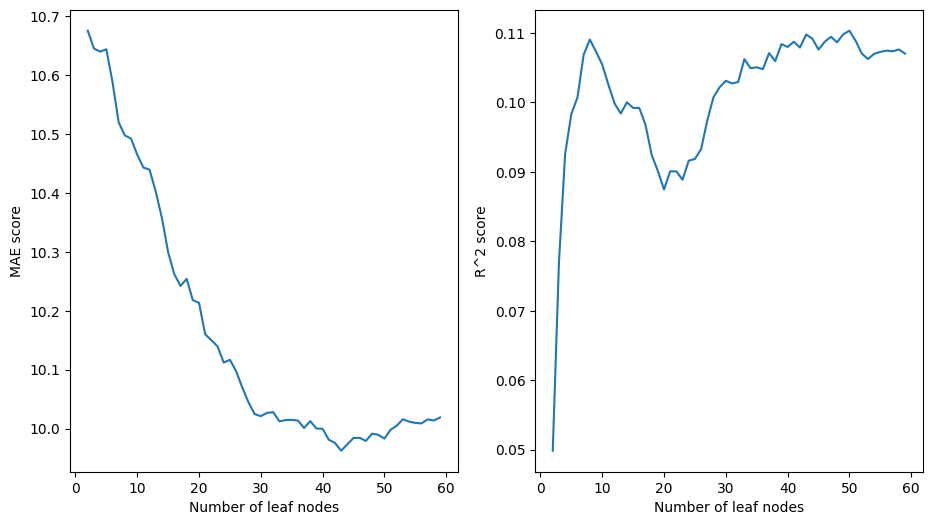

In [116]:
# Model tuning
leaf_nodes = range(2,60) 
mae_scores = []
r2_scores = []
for num_nodes in leaf_nodes:
    model = RandomForestRegressor(random_state = 123, max_leaf_nodes = num_nodes)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

fig, axes = plt.subplots(1,2,figsize = (11,6))

sns.lineplot(x = leaf_nodes, y = mae_scores, ax = axes[0])
sns.lineplot(x = leaf_nodes, y = r2_scores, ax = axes[1])

axes[0].set_xlabel("Number of leaf nodes")
axes[0].set_ylabel("MAE score")
axes[1].set_xlabel("Number of leaf nodes")
axes[1].set_ylabel("R^2 score")

40 leaf nodes seems to be around the optimal.

Judging from the $R^2$ scores and the MAE scores, the model does not explain the variability well, though it does yield somewhat accurate predicitons. All in all, the model seems to be performing poorly on unseen data.

In [117]:
# XGBoost Model
from xgboost import XGBRegressor
model2 = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 10, random_state = 123, learning_rate = 0.05)
model2.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)
y_pred = model2.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.490639048332149
0.09763123005979646


Overall, XGBoost model also performs poorly on the dataset. 

In [137]:
# Linear Model
from sklearn.linear_model import LinearRegression
import numpy as np

model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


10.160629593051125
0.17762872772242255


Linear model seems to also be performing poorly, though a little better than the last two models. Feature engineering may need to be conducted to improve model.

## Feature Engineering

In [149]:
# Re-encoding genre
from ast import literal_eval

def encode_genre(row):
    if type(row['genres']) is float:
        return 0
    else:
        encoding = 0
        for genre in literal_eval(row['genres']):
            encoding += games_cleaned.groupby(genre)['total_rating'].mean()[1]
        
        return encoding/len(literal_eval(row['genres']))

games_cleaned['genres_encoded'] = games_cleaned.apply(encode_genre, axis = 1)

games_cleaned[['genres_encoded']]

,genres_encoded
0,67.041290
1,68.307930
2,74.700042
3,70.922367
4,66.646087
...,...
311,0.000000
312,72.713057
313,72.713057
314,72.713057


In [152]:
# Re-encode themes
def encode_theme(row):
    if type(row['themes']) is float:
        return 0
    else:
        encoding = 0
        for theme in literal_eval(row['themes']):
            encoding += games_cleaned.groupby(theme)['total_rating'].mean()[1]
        
        return encoding/len(literal_eval(row['themes']))
    
games_cleaned['themes_encoded'] = games_cleaned.apply(encode_theme, axis = 1)

games_cleaned[['themes_encoded']]

,themes_encoded
0,74.291517
1,70.403024
2,75.189182
3,71.897326
4,71.897326
...,...
311,74.132202
312,71.897326
313,71.897326
314,71.897326


In [159]:
# Encode company
company_mean = games_cleaned.groupby('company')['total_rating'].mean()
games_cleaned['companies_encoded'] = games_cleaned['company'].map(company_mean)

games_cleaned[['companies_encoded']]

,companies_encoded
0,62.476241
1,62.476241
2,62.476241
3,62.476241
4,62.476241
...,...
311,71.808628
312,71.808628
313,71.808628
314,71.808628


## Midpoint Model Building

In [303]:
X = games_cleaned[['genres_encoded','themes_encoded','companies_encoded']]
y = games_cleaned['total_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [304]:
# Random Forest Model
model_updated = RandomForestRegressor(random_state = 123, max_leaf_nodes = 60)
model_updated.fit(X_train, y_train)
y_pred = model_updated.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

9.279332025041944
0.25607014863155


In [305]:
# XGBoost Model
model2_updated = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 10, random_state = 123, learning_rate = 0.01)
model2_updated.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)
y_pred = model2_updated.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

9.810851887759538
0.19872240360617777


The Random Forest Model and XGBoost Model seem to have improved significantly well with the new adjustments. This is possibly due to the reduction of features that reduces possible overfitting.

In [306]:
# Linear model
model3_updated = LinearRegression()
model3_updated.fit(X_train, y_train)
y_pred = model3_updated.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.417104269900737
0.08036282977621656


On the other hand, the linear regression model reduced in performance significantly. This is possibly due to the lack of linearity between response variable and predictor variables.

## Feature Engineering (continued)

In [313]:
# K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_kmeans_train = games_cleaned[['genres_encoded','themes_encoded','companies_encoded']].copy()
X_kmeans_train[['genres_encoded','themes_encoded','companies_encoded']] = scaler.fit_transform(games_cleaned[['genres_encoded',
                                                                                                              'themes_encoded',
                                                                                                              'companies_encoded']])

kmeans = KMeans(n_clusters = 5)
games_cleaned['Cluster'] = kmeans.fit_predict(X_kmeans_train)
games_cleaned['Cluster']


0      0
1      0
2      0
3      0
4      0
      ..
311    2
312    1
313    1
314    1
315    1
Name: Cluster, Length: 316, dtype: int32

## Final Model Building 

In [333]:
X = games_cleaned[['genres_encoded','themes_encoded','companies_encoded', 'Cluster']]
y = games_cleaned['total_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [334]:
# Random Forest Model
model_final = RandomForestRegressor(random_state = 123, max_leaf_nodes = 60)
model_final.fit(X_train, y_train)
y_pred = model_final.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

9.24821953337484
0.25887223303614104


In [335]:
# XGBoost Model
model2_final = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 10, random_state = 123, learning_rate = 0.01)
model2_final.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)
y_pred = model2_final.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

9.479084402892274
0.25384375326364383


In [336]:
# Linear model
model3_updated = LinearRegression()
model3_updated.fit(X_train, y_train)
y_pred = model3_updated.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.328821669935804
0.09397348467565392


Looking at the final models, the best model to use is a Random Forest Model. 